In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, explained_variance_score, mean_absolute_error, mean_squared_error
%matplotlib inline 

# MLL Results

In [27]:
#nucset = 15
nucset = 29

In [28]:
path = '~/sims_n_results/simupdates_aug2020/'
uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]
mll = {}
for i, unc_job in enumerate(job_dirs):
    if nucset == 15:
        mll['unc' + str(i)] = pd.read_csv(path + 'train15/' + unc_job + '/' + unc_job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
    else:
        mll['unc' + str(i)] = pd.read_csv(path + 'train29/' + unc_job + '/' + unc_job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])   

In [29]:
rxtr_mll = []
burn_mll = []
enri_mll = []
cool_mll = []
for i, unc_job in enumerate(uncs):
    key = 'unc' + str(i)
    rxtr_mll.append(accuracy_score(mll[key]['ReactorType'], mll[key]['pred_ReactorType']))
    burn_mll.append(explained_variance_score(mll[key]['Burnup'], mll[key]['pred_Burnup']))
    enri_mll.append(explained_variance_score(mll[key]['Enrichment'], mll[key]['pred_Enrichment']))
    cool_mll.append(explained_variance_score(mll[key]['CoolingTime'], mll[key]['pred_CoolingTime']))

# Plotting

In [30]:
# color dict (use: colors['XColor'])
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

In [31]:
if nucset == 15:
    learn_path = 'learn15/rand_err/'
    csv_end = '_nuc15_random_error.csv'
else:
    learn_path = 'learn29/rand_err/'
    csv_end = '_nuc29_random_error.csv'
fracs = ['0.1', '0.3', '1.0']
burn_knn = {}
burn_dtr = {}
rxtr_knn = {}
rxtr_dtr = {}
enri_knn = {}
enri_dtr = {}
cool_knn = {}
cool_dtr = {}
for frac in fracs:
    burn_knn['tset'+frac] = pd.read_csv(path + learn_path + 'burnup_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
    burn_dtr['tset'+frac] = pd.read_csv(path + learn_path + 'burnup_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')
    rxtr_knn['tset'+frac] = pd.read_csv(path + learn_path + 'reactor_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
    rxtr_dtr['tset'+frac] = pd.read_csv(path + learn_path + 'reactor_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')
    enri_knn['tset'+frac] = pd.read_csv(path + learn_path + 'enrichment_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
    enri_dtr['tset'+frac] = pd.read_csv(path + learn_path + 'enrichment_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')
    cool_knn['tset'+frac] = pd.read_csv(path + learn_path + 'cooling_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
    cool_dtr['tset'+frac] = pd.read_csv(path + learn_path + 'cooling_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')

In [32]:
def plot_scorecurves(title): 
    plt.clf()    
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)   
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Percent Error', fontsize=20, labelpad=15)
    ax.set_ylabel('Score', fontsize=20, labelpad=15)
    
    if nucset == 15:
        sv_base = '../plots/randerr_compare_nuc15_score_'
    else:
        sv_base = '../plots/randerr_compare_nuc29_score_'
    knn_scr = 'kNN ExpVar'
    dtr_scr = 'DTree ExpVar'
    knn_std = 'kNN ExpVar Std'
    dtr_std = 'DTree ExpVar Std'
    if 'Reactor' in title:
        knn = rxtr_knn
        dtr = rxtr_dtr
        mll = rxtr_mll
        knn_scr = 'kNN Acc'
        dtr_scr = 'DTree Acc'
        knn_std = 'kNN Acc Std'
        dtr_std = 'DTree Acc Std'
        sv_fig = sv_base + 'rxtr.png'
    elif 'Burnup' in title:
        knn = burn_knn
        dtr = burn_dtr
        mll = burn_mll
        sv_fig = sv_base + 'burn.png'
    elif 'Enrichment' in title:
        knn = enri_knn
        dtr = enri_dtr
        mll = enri_mll
        sv_fig = sv_base + 'enri.png'
    else:
        knn = cool_knn
        dtr = cool_dtr
        mll = cool_mll
        sv_fig = sv_base + 'cool.png'
    
    ## Scikit Results
    err = burn_knn['tset0.1']['Percent Error']
    tset = ['tset0.1', 'tset0.3', 'tset1.0']
    hue = {'tset0.1' : 'L', 'tset0.3' : 'M', 'tset1.0' : 'D'}
    for t in tset:
        ax.fill_between(err, knn[t][knn_scr] - knn[t][knn_std], knn[t][knn_scr] + knn[t][knn_std], color = colors[hue[t]+'Brwn'], alpha=0.2)
        ax.fill_between(err, dtr[t][dtr_scr] - dtr[t][dtr_std], dtr[t][dtr_scr] + dtr[t][dtr_std], color = colors[hue[t]+'Teal'], alpha=0.2)
        ax.plot(err, knn[t][knn_scr], 'o-', color=colors[hue[t]+'Brwn'], mew=0, ms=5, label='kNN, Set Frac: ' + t[4:])
        ax.plot(err, dtr[t][dtr_scr], 'o-', color=colors[hue[t]+'Teal'], mew=0, ms=5, label='Dec Tree, Set Frac: ' + t[4:])
    
    ## MLL Results
    unc = [100*x for x in uncs]
    ax.plot(unc, mll, 'o-', color=colors['DPurp'], mew=0, ms=5, label='MLL Calc')
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))
    plt.show()
    
    fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

## 29 nuc trainset

<Figure size 432x288 with 0 Axes>

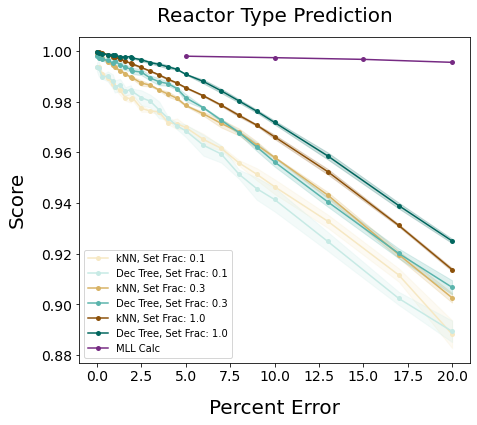

<Figure size 432x288 with 0 Axes>

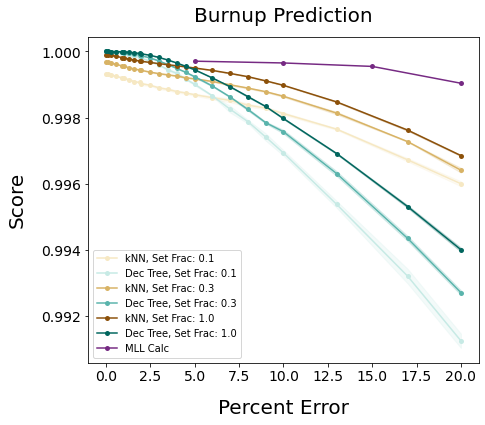

<Figure size 432x288 with 0 Axes>

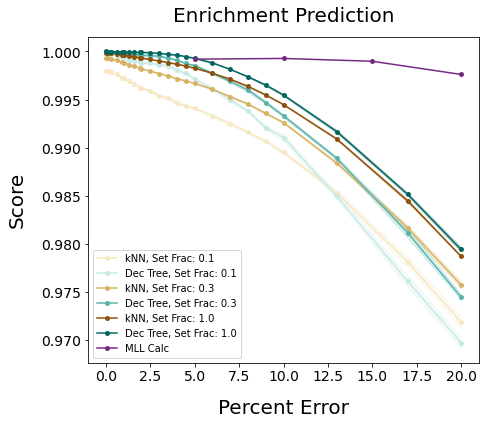

<Figure size 432x288 with 0 Axes>

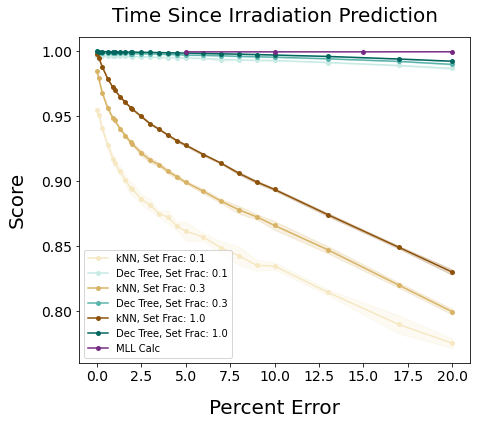

In [33]:
plot_scorecurves('Reactor Type Prediction')
plot_scorecurves('Burnup Prediction')
plot_scorecurves('Enrichment Prediction')
plot_scorecurves('Time Since Irradiation Prediction')

## 15 nuc trainset

<Figure size 432x288 with 0 Axes>

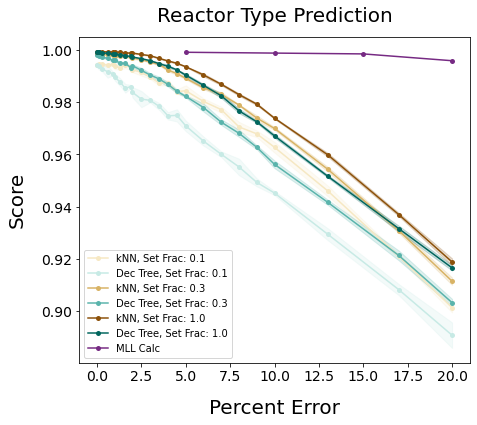

<Figure size 432x288 with 0 Axes>

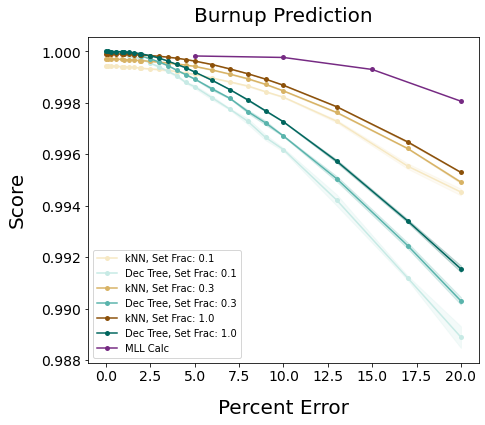

<Figure size 432x288 with 0 Axes>

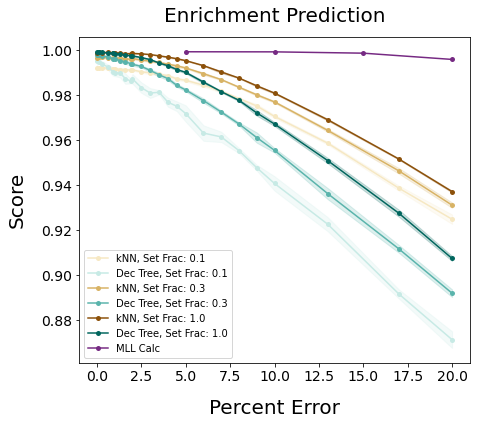

<Figure size 432x288 with 0 Axes>

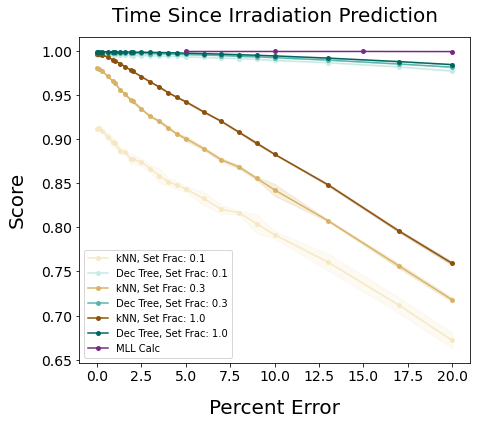

In [22]:
plot_scorecurves('Reactor Type Prediction')
plot_scorecurves('Burnup Prediction')
plot_scorecurves('Enrichment Prediction')
plot_scorecurves('Time Since Irradiation Prediction')

In [34]:
burn_mll_mae = []
enri_mll_mae = []
cool_mll_mae = []
burn_mll_rms = []
enri_mll_rms = []
cool_mll_rms = []
for i, unc_job in enumerate(uncs):
    burn_mll_mae.append(-mean_absolute_error(mll['unc'+str(i)]['Burnup'], mll['unc'+str(i)]['pred_Burnup']))
    enri_mll_mae.append(-mean_absolute_error(mll['unc'+str(i)]['Enrichment'], mll['unc'+str(i)]['pred_Enrichment']))
    cool_mll_mae.append(-mean_absolute_error(mll['unc'+str(i)]['CoolingTime'], mll['unc'+str(i)]['pred_CoolingTime']))
    burn_mll_rms.append(-np.sqrt(mean_squared_error(mll['unc'+str(i)]['Burnup'], mll['unc'+str(i)]['pred_Burnup'])))
    enri_mll_rms.append(-np.sqrt(mean_squared_error(mll['unc'+str(i)]['Enrichment'], mll['unc'+str(i)]['pred_Enrichment'])))
    cool_mll_rms.append(-np.sqrt(mean_squared_error(mll['unc'+str(i)]['CoolingTime'], mll['unc'+str(i)]['pred_CoolingTime'])))

In [35]:
def plot_errorcurves(title, err_type): 
    plt.clf()    
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)   
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Percent Error', fontsize=20, labelpad=15)
    ax.set_ylabel('Negative ' + err_type, fontsize=20, labelpad=15)
    
    sv_base = '../plots/randerr_compare_oldtset3_nuc15_' + err_type #randerr_compare_nuc29_'
    if nucset == 15:
        sv_base = '../plots/randerr_compare_nuc15_' + err_type
    else:
        sv_base = '../plots/randerr_compare_nuc29_' + err_type
    knn_err = 'kNN ' + err_type
    dtr_err = 'DTree ' + err_type
    knn_std = 'kNN ' + err_type + ' Std'
    dtr_std = 'DTree ' + err_type + ' Std'
    if 'Burnup' in title:
        if err_type == 'MAE':
            mll = burn_mll_mae
        else:
            mll = burn_mll_rms
        knn = burn_knn
        dtr = burn_dtr
        sv_fig = sv_base + '_burn.png'
    elif 'Enrichment' in title:
        if err_type == 'MAE':
            mll = enri_mll_mae
        else:
            mll = enri_mll_rms
        knn = enri_knn
        dtr = enri_dtr
        sv_fig = sv_base + '_enri.png'
    else:
        if err_type == 'MAE':
            mll = cool_mll_mae
        else:
            mll = cool_mll_rms
        knn = cool_knn
        dtr = cool_dtr
        sv_fig = sv_base + '_cool.png'
    
    ## Scikit Results
    err = burn_knn['tset0.1']['Percent Error']
    tset = ['tset0.1', 'tset0.3', 'tset1.0']
    hue = {'tset0.1' : 'L', 'tset0.3' : 'M', 'tset1.0' : 'D'}
    for t in tset:
        ax.fill_between(err, knn[t][knn_err] - knn[t][knn_std], knn[t][knn_err] + knn[t][knn_std], color = colors[hue[t]+'Brwn'], alpha=0.2)
        ax.fill_between(err, dtr[t][dtr_err] - dtr[t][dtr_std], dtr[t][dtr_err] + dtr[t][dtr_std], color = colors[hue[t]+'Teal'], alpha=0.2)
        ax.plot(err, knn[t][knn_err], 'o-', color=colors[hue[t]+'Brwn'], mew=0, ms=5, label='kNN, Set Frac: ' + t[4:])
        ax.plot(err, dtr[t][dtr_err], 'o-', color=colors[hue[t]+'Teal'], mew=0, ms=5, label='Dec Tree, Set Frac: ' + t[4:])
    
    ## MLL Results
    unc = [100*x for x in uncs]
    ax.plot(unc, mll, 'o-', color=colors['DPurp'], mew=0, ms=5, label='MLL Calc')
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))
    plt.show()
    
    fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

## MAE

<Figure size 432x288 with 0 Axes>

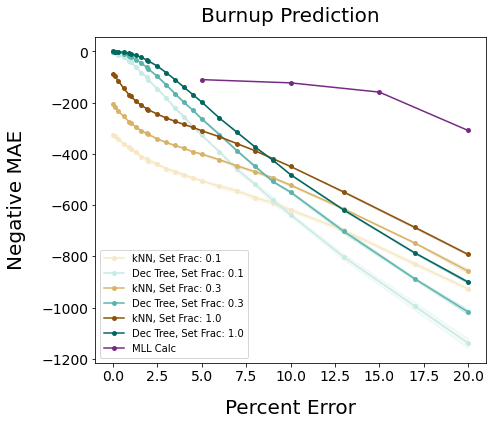

<Figure size 432x288 with 0 Axes>

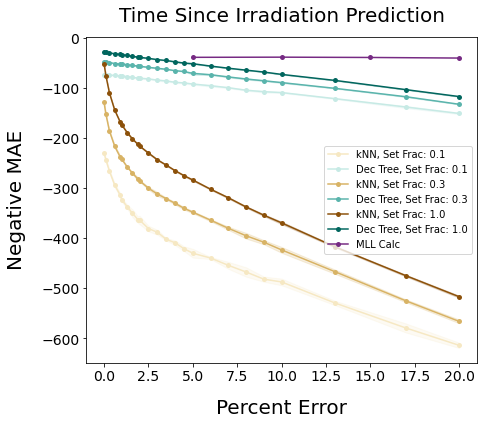

<Figure size 432x288 with 0 Axes>

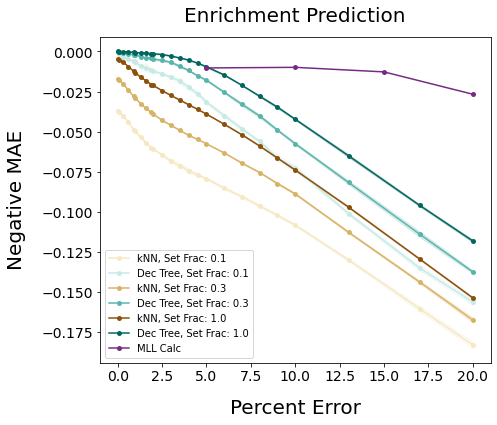

In [36]:
plot_errorcurves('Burnup Prediction', 'MAE')
plot_errorcurves('Time Since Irradiation Prediction', 'MAE')
plot_errorcurves('Enrichment Prediction', 'MAE')

## RMSE

<Figure size 432x288 with 0 Axes>

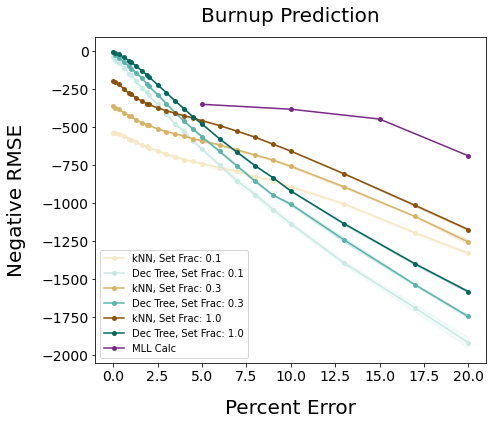

<Figure size 432x288 with 0 Axes>

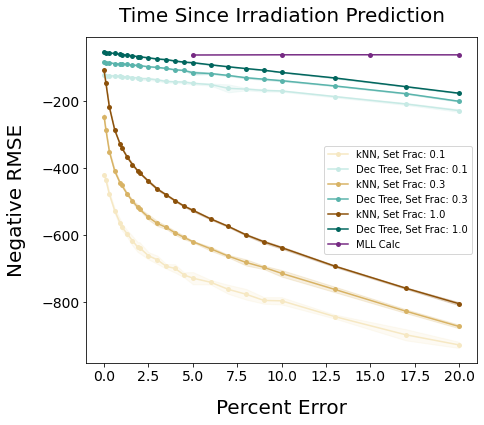

<Figure size 432x288 with 0 Axes>

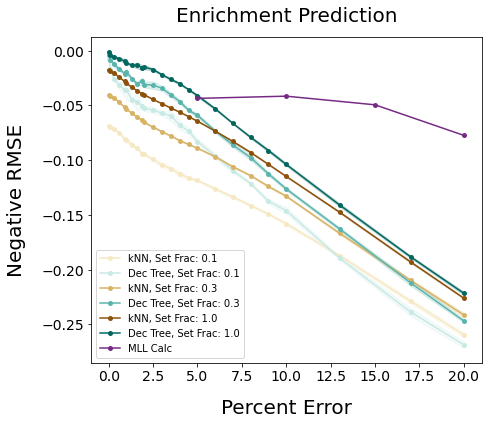

In [37]:
plot_errorcurves('Burnup Prediction', 'RMSE')
plot_errorcurves('Time Since Irradiation Prediction', 'RMSE')
plot_errorcurves('Enrichment Prediction', 'RMSE')